# Credit Card Fraud Deduction - Using ML Model


In [63]:
# Importing the Essential Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Instering the Data set 

df  = pd.read_csv('C:\\Users\\madhu\\OneDrive\\Desktop\\Credit Card\\card_transdata.csv')


In [65]:
# Display the First 5 rows in the Dataset
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [66]:
# Display the last 5 rows in the Dataset.

df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [67]:
# Identify the Shape of the Dataset.

df.shape

(1000000, 8)

In [68]:
# Display the Data Types of the Columns in the Dataset.

df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [69]:
# Checking for the null Values in the Dataset.

df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [70]:
# As repeat_retailer,Used_chip,used_pin_number,online_order,fraud are binary Variables converting them to int.

df[['repeat_retailer','used_chip','used_pin_number','online_order','fraud']] = df[['repeat_retailer','used_chip','used_pin_number','online_order','fraud']].astype(int)

In [71]:
# Checking whether the Data is balance or imbalanced.         # The Data is Highly imbalanced.

df['fraud'].value_counts()

fraud
0    912597
1     87403
Name: count, dtype: int64

# Visual Representation of Distribution among the Varaibles.

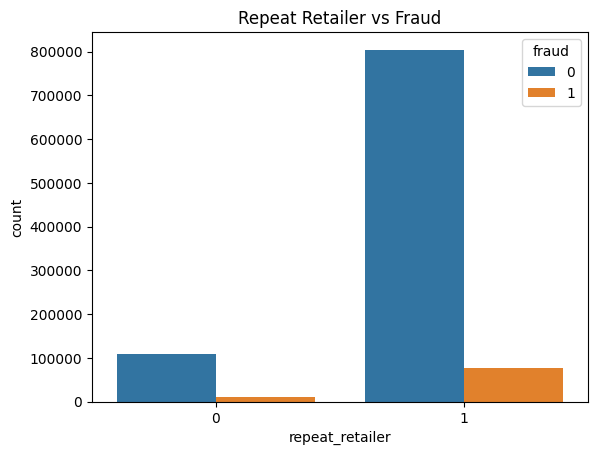

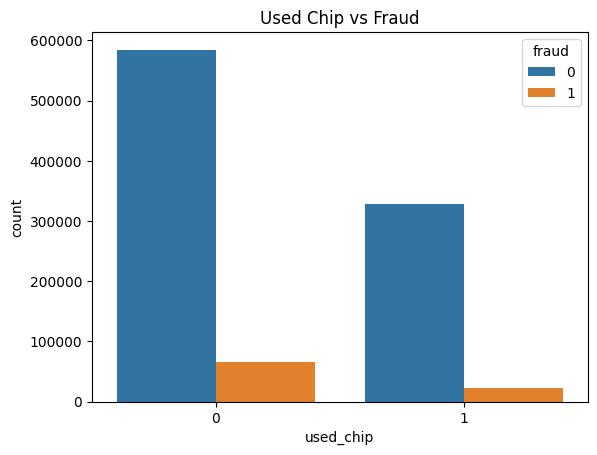

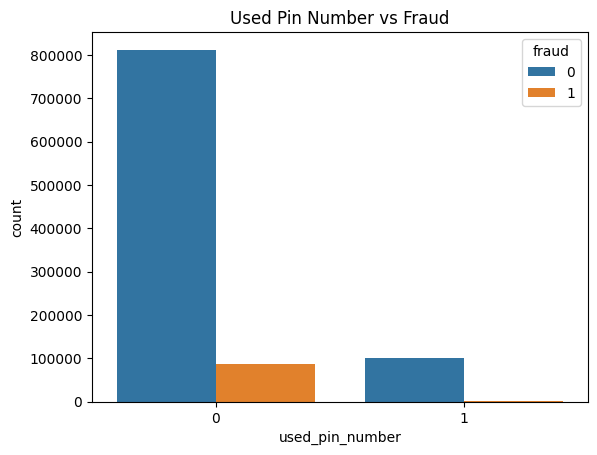

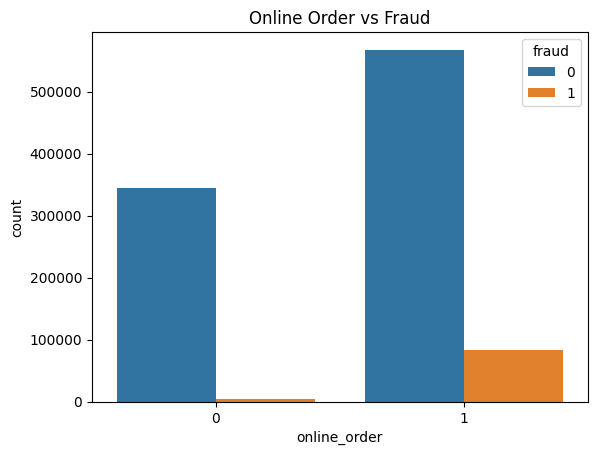

In [72]:
# Display How  fraud and non-fraud transactions are distributed across the different features.

sns.countplot(x='repeat_retailer', hue='fraud', data=df)
plt.title('Repeat Retailer vs Fraud')
plt.show()

sns.countplot(x='used_chip', hue='fraud', data=df)
plt.title('Used Chip vs Fraud')
plt.show()

sns.countplot(x='used_pin_number', hue='fraud', data=df)
plt.title('Used Pin Number vs Fraud')
plt.show()

sns.countplot(x='online_order', hue='fraud', data=df)
plt.title('Online Order vs Fraud')
plt.show()




In [73]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

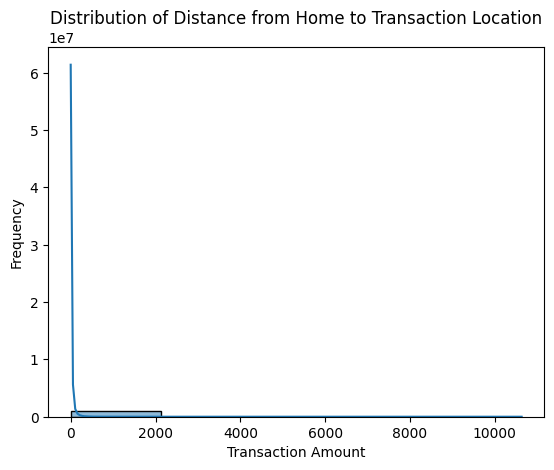

In [74]:
# Display the Distribution of Numerical (Continuous) Features.

sns.histplot(df['distance_from_home'],bins=5, kde=True)
plt.title('Distribution of Distance from Home to Transaction Location')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


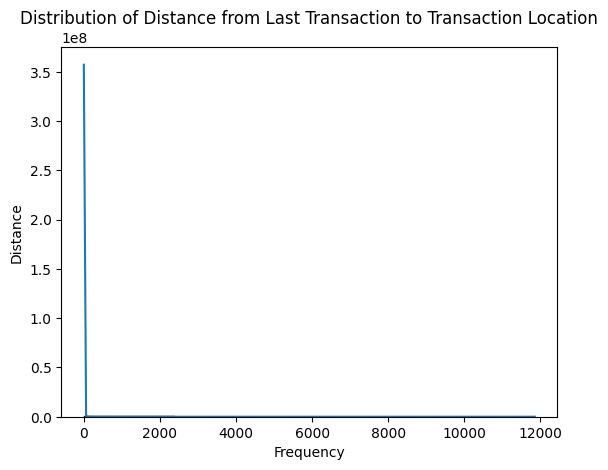

In [75]:
sns.histplot(df['distance_from_last_transaction'],bins=5,kde=True)
plt.title('Distribution of Distance from Last Transaction to Transaction Location')
plt.xlabel('Frequency')
plt.ylabel('Distance')
plt.show()


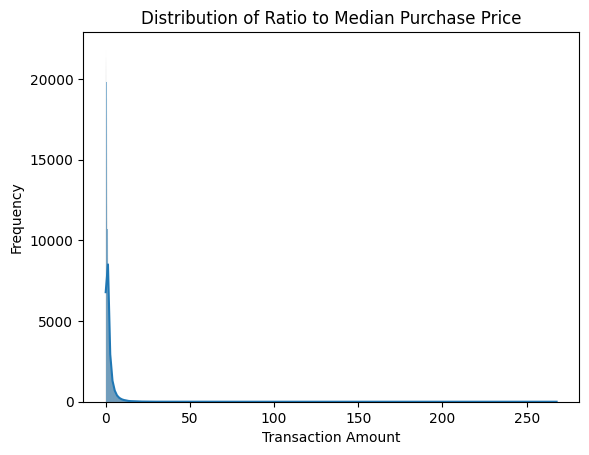

In [76]:
sns.histplot(df['ratio_to_median_purchase_price'], kde=True)
plt.title('Distribution of Ratio to Median Purchase Price')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

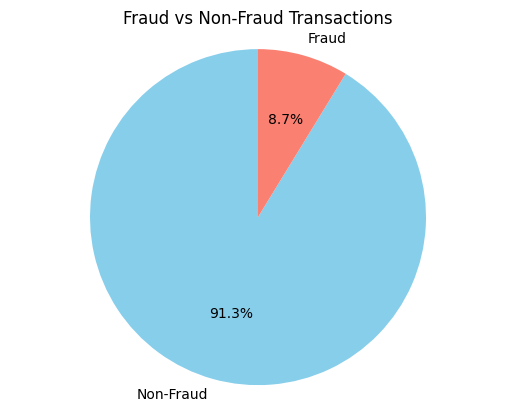

In [77]:
import matplotlib.pyplot as plt

# Count values
fraud_counts = df['fraud'].value_counts()

# Plot pie chart using matplotlib
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

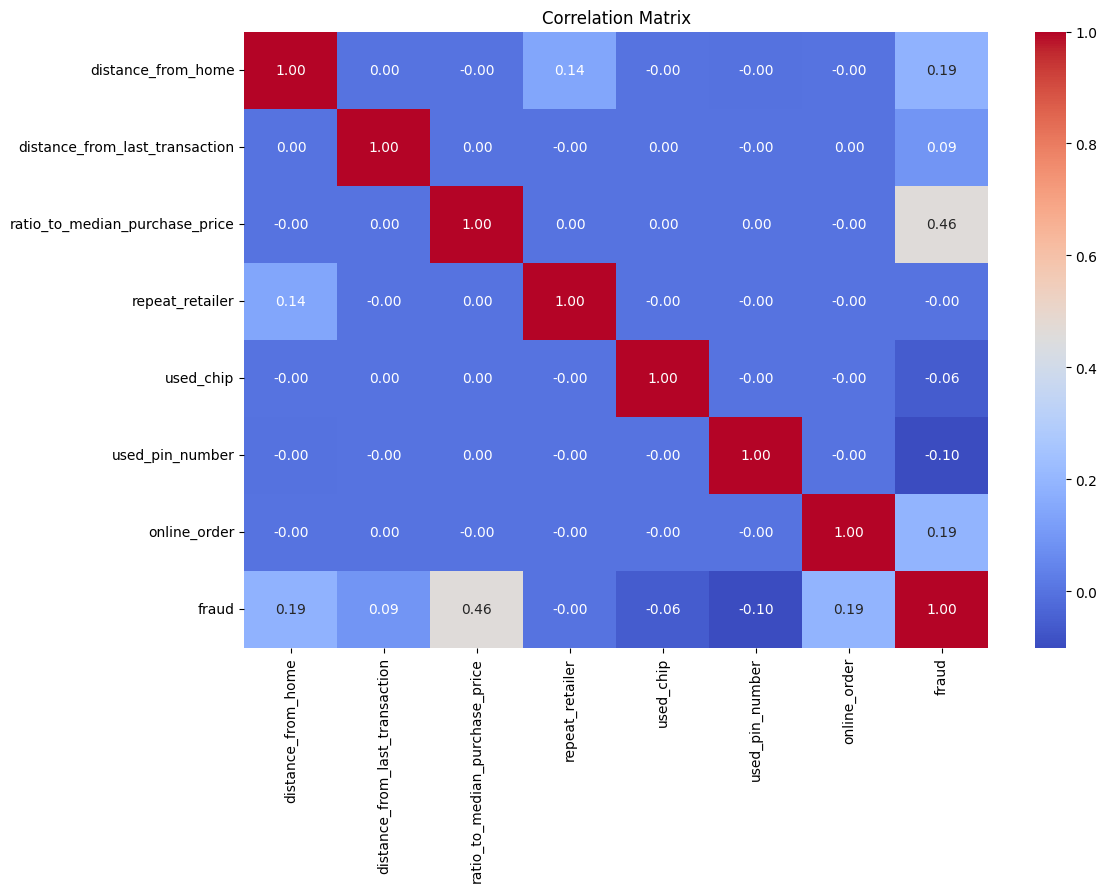

In [78]:
# Checking for the Correlation between the features.

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')


In [79]:
# The Distribution of the Numerical (Contineous) Features is not Normal. 

df['distance_from_home'].describe()

count    1000000.000000
mean          26.628792
std           65.390784
min            0.004874
25%            3.878008
50%            9.967760
75%           25.743985
max        10632.723672
Name: distance_from_home, dtype: float64

In [80]:
df['distance_from_last_transaction'].describe()

count    1000000.000000
mean           5.036519
std           25.843093
min            0.000118
25%            0.296671
50%            0.998650
75%            3.355748
max        11851.104565
Name: distance_from_last_transaction, dtype: float64

In [81]:
df['ratio_to_median_purchase_price'].describe()

count    1000000.000000
mean           1.824182
std            2.799589
min            0.004399
25%            0.475673
50%            0.997717
75%            2.096370
max          267.802942
Name: ratio_to_median_purchase_price, dtype: float64

# Creating the Target Variable and Independent Variables for the model


In [82]:
X = df.drop(['fraud'], axis=1)
y = df['fraud']

# Creating the ML Model for Prediction

In [83]:
# Importing the Essentials

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


In [85]:
# Checking the Value Counts and Shape of X_train and y_train and X_test and y_test.

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("-----------------------------------------------------------------")

print("y_train value counts:",y_train.value_counts())
print("y_test value counts:",y_test.value_counts())



X_train shape: (700000, 7)
y_train shape: (700000,)
X_test shape: (300000, 7)
y_test shape: (300000,)
-----------------------------------------------------------------
y_train value counts: fraud
0    638726
1     61274
Name: count, dtype: int64
y_test value counts: fraud
0    273871
1     26129
Name: count, dtype: int64


In [86]:
# As the Data is Imbalance we are using Under Sampling Technique to balance the Data.

from imblearn.under_sampling import RandomUnderSampler

# Create an instance of the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
# Fit and apply the random undersampling
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [87]:
# Checking the value of the y_resample data.

print("y_resampled value counts:", y_resampled.value_counts())

y_resampled value counts: fraud
0    61274
1    61274
Name: count, dtype: int64


In [88]:
# Checking the Shape of the X_resampled and y_resampled data.

print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

X_resampled shape: (122548, 7)
y_resampled shape: (122548,)


In [89]:
# Using this resampled data to train and test the Model and apply standard scaler for Numerical (Contineous Features) as they are skewed.


#  Identify numerical columns to scale
numerical_cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']  

#  Apply StandardScaler
scaler = StandardScaler()
X_resampled[numerical_cols] = scaler.fit_transform(X_resampled[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [90]:
# Creating Random Forest Classifier Model.
rf_model = RandomForestClassifier (random_state=42)
# Fitting the Model on the Resampled Data.
rf_model.fit(X_resampled, y_resampled)
# Making Predictions on the Test Data.
y_pred = rf_model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    273871
           1       1.00      1.00      1.00     26129

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



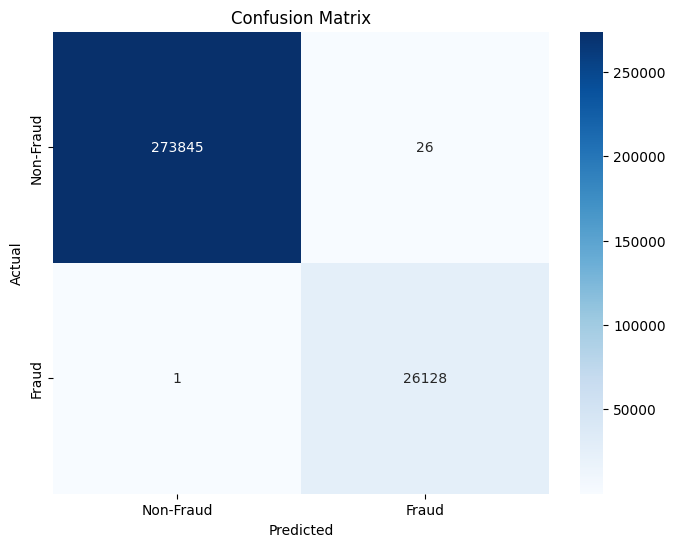

In [91]:
# Checking the Classification Report and Confusion Matrix.

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
